# Tesla Driver accident prediction
### This research predicts and outcome of an accident in tesla series from model S - X
#### Data set contains - 
- year
- model of car
- country
- state
- description
- Deaths
- tesla occupant
- autopilot claimed
- tesla driver

where all the features mentioned above is used for independent feature except tesla driver which is our outcome.

#### I have used ensemble method to solve this particular problem.
including its hypothesis and visual representation of these methodologies

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Tesla Deaths - Deaths (3).csv")
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,TSLA+cycl / peds,Model,AutoPilot claimed,Verified Tesla Autopilot Death,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,254,2022,8/16/2022,Germany,NaN,"Tesla car crashes into tree, burns",2,NaN,NaN,-,...,2,NaN,-,-,https://www.tag24.de/nachrichten/unfall/tesla...,NaN,NaN,NaN,NaN,NaN
1,253,2022,8/15/2022,USA,CA,Tesla veers into oncoming traffic,4,1,3,-,...,4,NaN,-,-,https://www.ksbw.com/article/hollister-crash-...,NaN,NaN,NaN,NaN,NaN
2,252,2022,8/14/2022,Finland,NaN,Unlicensed driver hits pedestrian,1,-,-,-,...,1,NaN,-,-,https://yle.fi/uutiset/3-12576787,NaN,NaN,NaN,NaN,NaN
3,251,2022,8/2/2022,USA,FL,Man in wheelchair hit crossing road,1,-,-,-,...,1,3,-,-,https://www.wfla.com/news/man-in-wheelchair-f...,NaN,NaN,NaN,NaN,NaN
4,250,2022,7/27/2022,USA,ME,Tesla crashes at high speed,1,1,-,-,...,1,-,-,-,https://www.boothbayregister.com/article/sout...,NaN,James T. Penner,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Case #                                0
Year                                  0
Date                                  0
 Country                              0
 State                               69
 Description                          0
 Deaths                               0
 Tesla driver                         4
 Tesla occupant                       8
 Other vehicle                        3
 Cyclists/ Peds                       2
 TSLA+cycl / peds                     1
 Model                                3
 AutoPilot claimed                    4
 Verified Tesla Autopilot Death       0
 Source                               0
 Note                               246
 Deceased 1                         183
 Deceased 2                         239
 Deceased 3                         250
 Deceased 4                         254
dtype: int64

In [5]:
def DatasetExam(df):
    print(df.shape)
    print(df.duplicated().sum())
    Initial_table = pd.DataFrame(
        {
            "Unique": df.nunique(),
            "Null Values": df.isna().sum(),
            "Null Percentage": df.isna().sum()/len(df),
            "Data Types": df.dtypes.values
        }
    )

    display(Initial_table)
DatasetExam(df)

(254, 21)
0


,Unique,Null Values,Null Percentage,Data Types
Case #,254,0,0.000000,int64
Year,10,0,0.000000,int64
Date,230,0,0.000000,object
Country,22,0,0.000000,object
State,34,69,0.271654,object
Description,212,0,0.000000,object
Deaths,4,0,0.000000,int64
Tesla driver,2,4,0.015748,object
Tesla occupant,4,8,0.031496,object
Other vehicle,5,3,0.011811,object


In [6]:
def NullHandler(df):
    for i in df.columns:
        if df[i].isna().sum()/len(df) >= 0.7:
            df.drop(i, inplace=True, axis=1)
    return df

In [7]:
NullHandler(df)

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,AutoPilot claimed,Verified Tesla Autopilot Death,Source
0,254,2022,8/16/2022,Germany,NaN,"Tesla car crashes into tree, burns",2,NaN,NaN,-,-,2,NaN,-,-,https://www.tag24.de/nachrichten/unfall/tesla...
1,253,2022,8/15/2022,USA,CA,Tesla veers into oncoming traffic,4,1,3,-,-,4,NaN,-,-,https://www.ksbw.com/article/hollister-crash-...
2,252,2022,8/14/2022,Finland,NaN,Unlicensed driver hits pedestrian,1,-,-,-,1,1,NaN,-,-,https://yle.fi/uutiset/3-12576787
3,251,2022,8/2/2022,USA,FL,Man in wheelchair hit crossing road,1,-,-,-,1,1,3,-,-,https://www.wfla.com/news/man-in-wheelchair-f...
4,250,2022,7/27/2022,USA,ME,Tesla crashes at high speed,1,1,-,-,-,1,-,-,-,https://www.boothbayregister.com/article/sout...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,5,2014,7/14/2014,USA,CA,Tesla kills motorcyclist,1,-,-,1,-,-,-,-,-,http://injurylawcentral.com/blog/dwight-dene-...
250,4,2014,7/4/2014,USA,CA,Thief crashes stolen Tesla,1,1,-,-,-,1,-,-,-,https://www.theverge.com/2014/7/10/5888463/ca...
251,3,2014,7/4/2014,USA,CA,Tesla rear ends stopped car,3,-,-,3,-,-,-,-,-,https://insideevs.com/3-dead-in-toyota-coroll...
252,2,2013,11/2/2013,USA,CA,Tesla kills cyclist,1,-,-,-,1,1,-,-,-,http://www.santacruzsentinel.com/general-news...


In [9]:
DatasetExam(df)

(254, 16)
0


,Unique,Null Values,Null Percentage,Data Types
Case #,254,0,0.000000,int64
Year,10,0,0.000000,int64
Date,230,0,0.000000,object
Country,22,0,0.000000,object
State,34,69,0.271654,object
Description,212,0,0.000000,object
Deaths,4,0,0.000000,int64
Tesla driver,2,4,0.015748,object
Tesla occupant,4,8,0.031496,object
Other vehicle,5,3,0.011811,object


In [10]:
df.columns = df.columns.str.replace(' ', '')

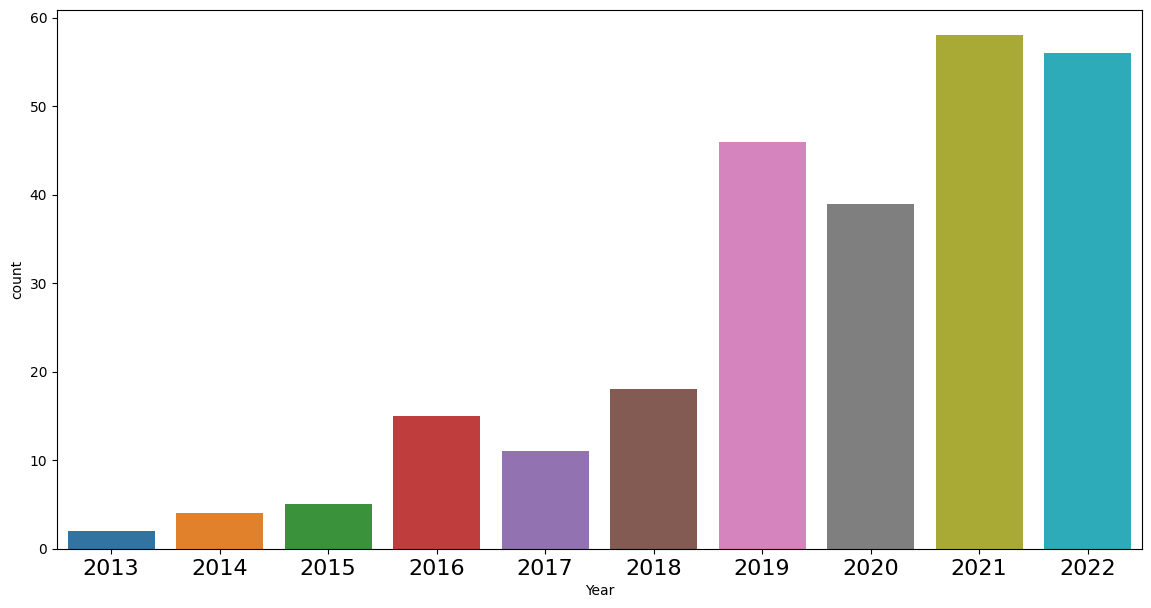

In [11]:
plt.figure(figsize = (14,7))
sns.countplot(df['Year'])
plt.xticks(fontsize=16)
plt.show()

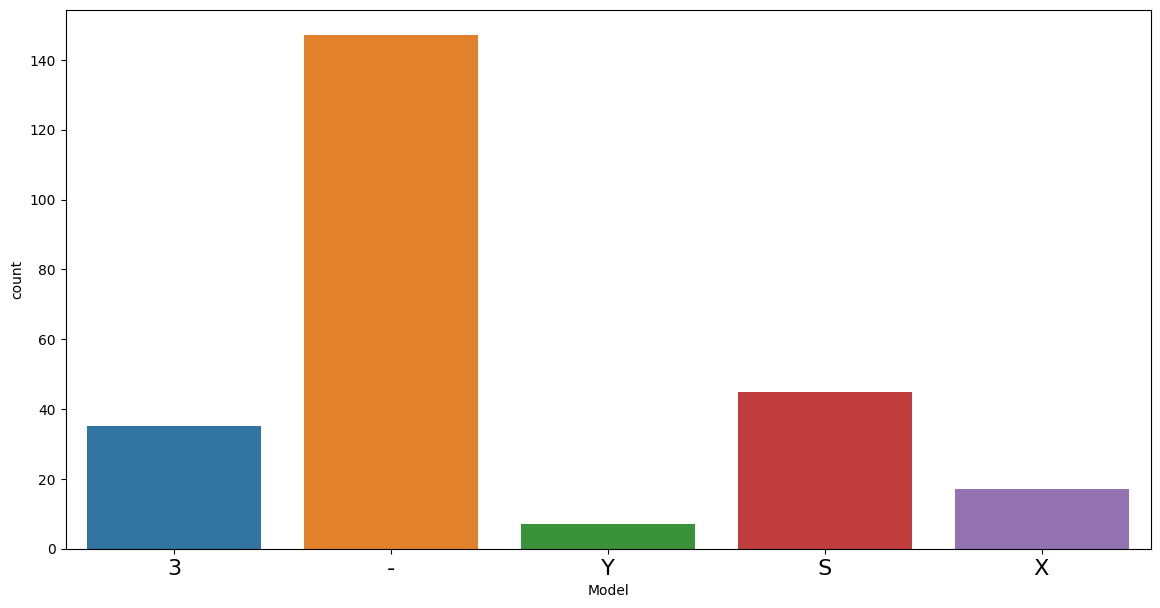

In [12]:
plt.figure(figsize=(14,7))
sns.countplot(df['Model'])
plt.xticks(fontsize=16)
plt.show()

In [13]:
df.columns

Index(['Case#', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesladriver', 'Teslaoccupant', 'Othervehicle', 'Cyclists/Peds',
       'TSLA+cycl/peds', 'Model', 'AutoPilotclaimed',
       'VerifiedTeslaAutopilotDeath', 'Source'],
      dtype='object')

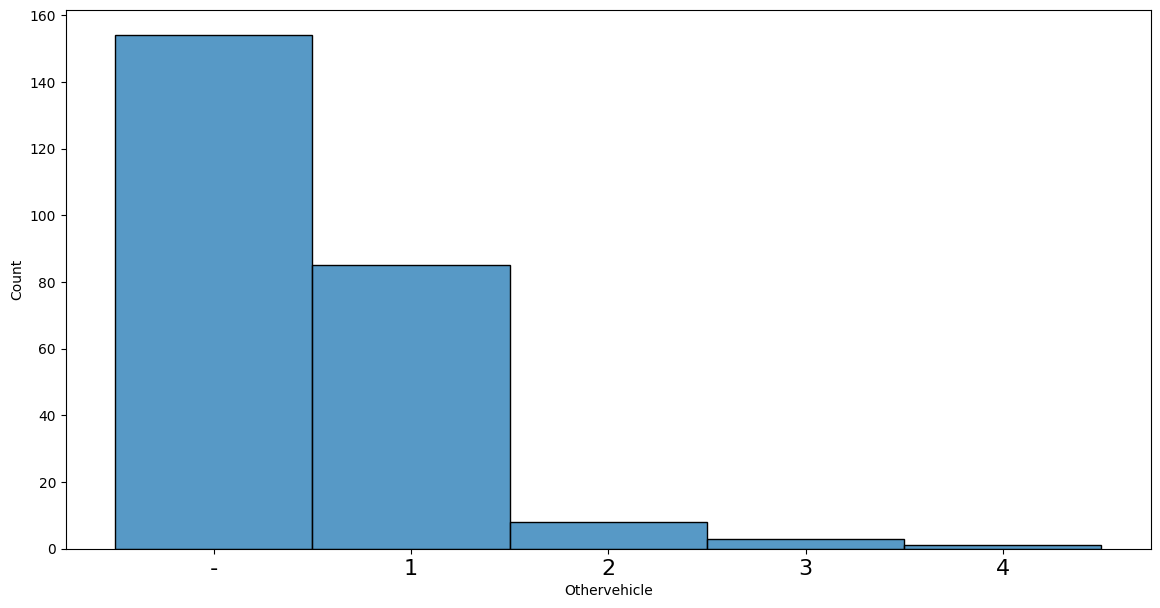

In [14]:
plt.figure(figsize=(14,7))
sns.histplot(df['Othervehicle'])
plt.xticks(fontsize= 16)
plt.show()

In [15]:
model_df = df[["Country", "Deaths", "Model", "Cyclists/Peds","TSLA+cycl/peds","AutoPilotclaimed","VerifiedTeslaAutopilotDeath", "State", "Tesladriver"]]

In [16]:
model_df.head()

,Country,Deaths,Model,Cyclists/Peds,TSLA+cycl/peds,AutoPilotclaimed,VerifiedTeslaAutopilotDeath,State,Tesladriver
0,Germany,2,NaN,-,2,-,-,NaN,NaN
1,USA,4,NaN,-,4,-,-,CA,1
2,Finland,1,NaN,1,1,-,-,NaN,-
3,USA,1,3,1,1,-,-,FL,-
4,USA,1,-,-,1,-,-,ME,1


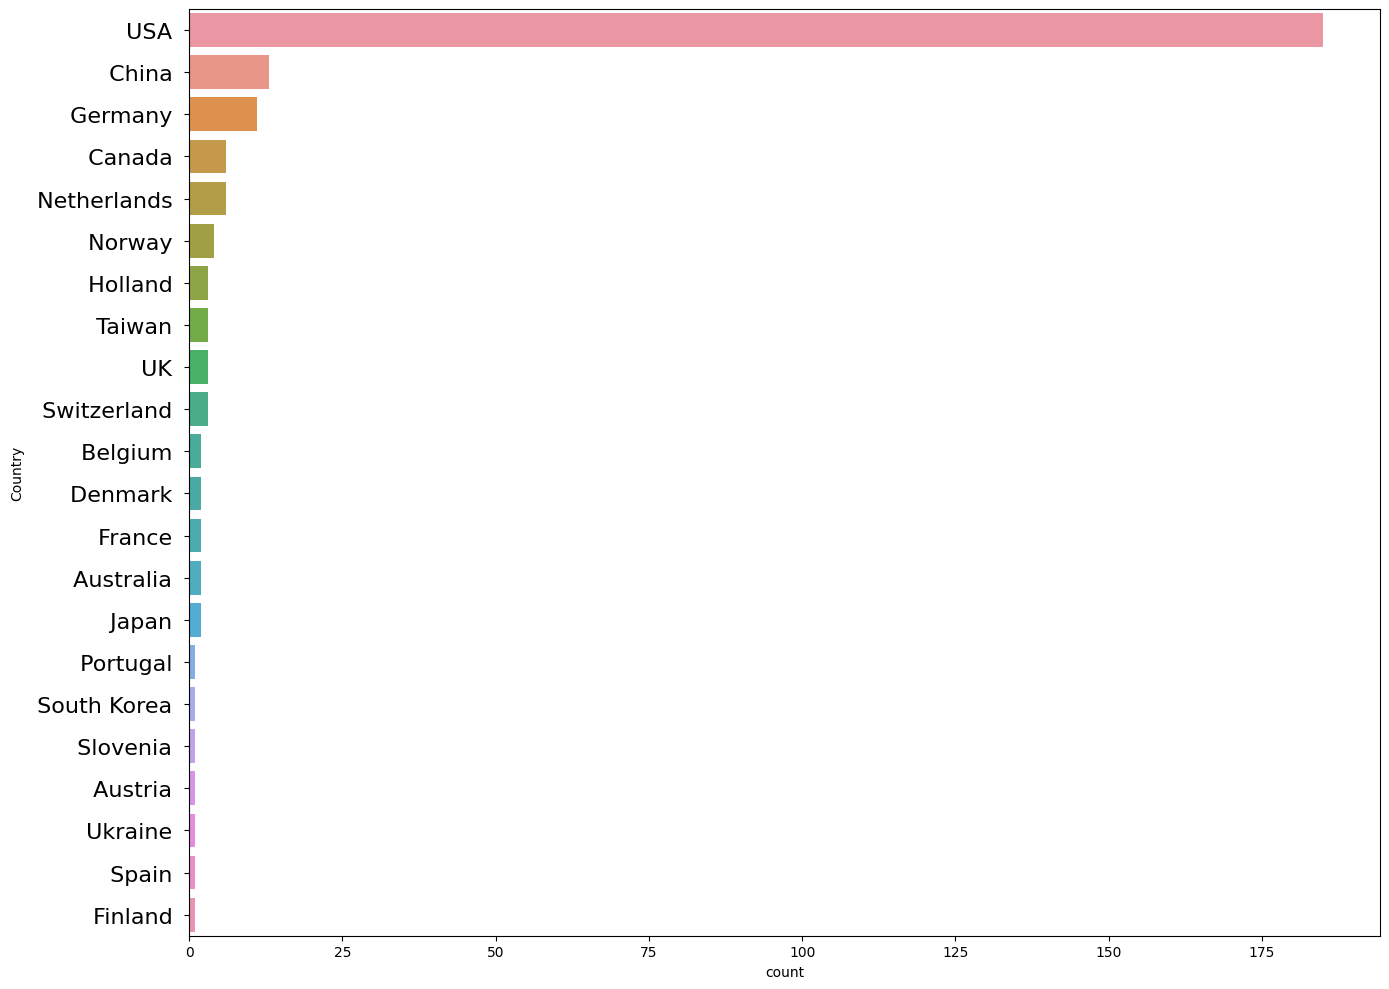

In [17]:
plt.figure(figsize=(14,10))
sns.countplot(y = model_df['Country'], order = model_df['Country'].value_counts().index)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

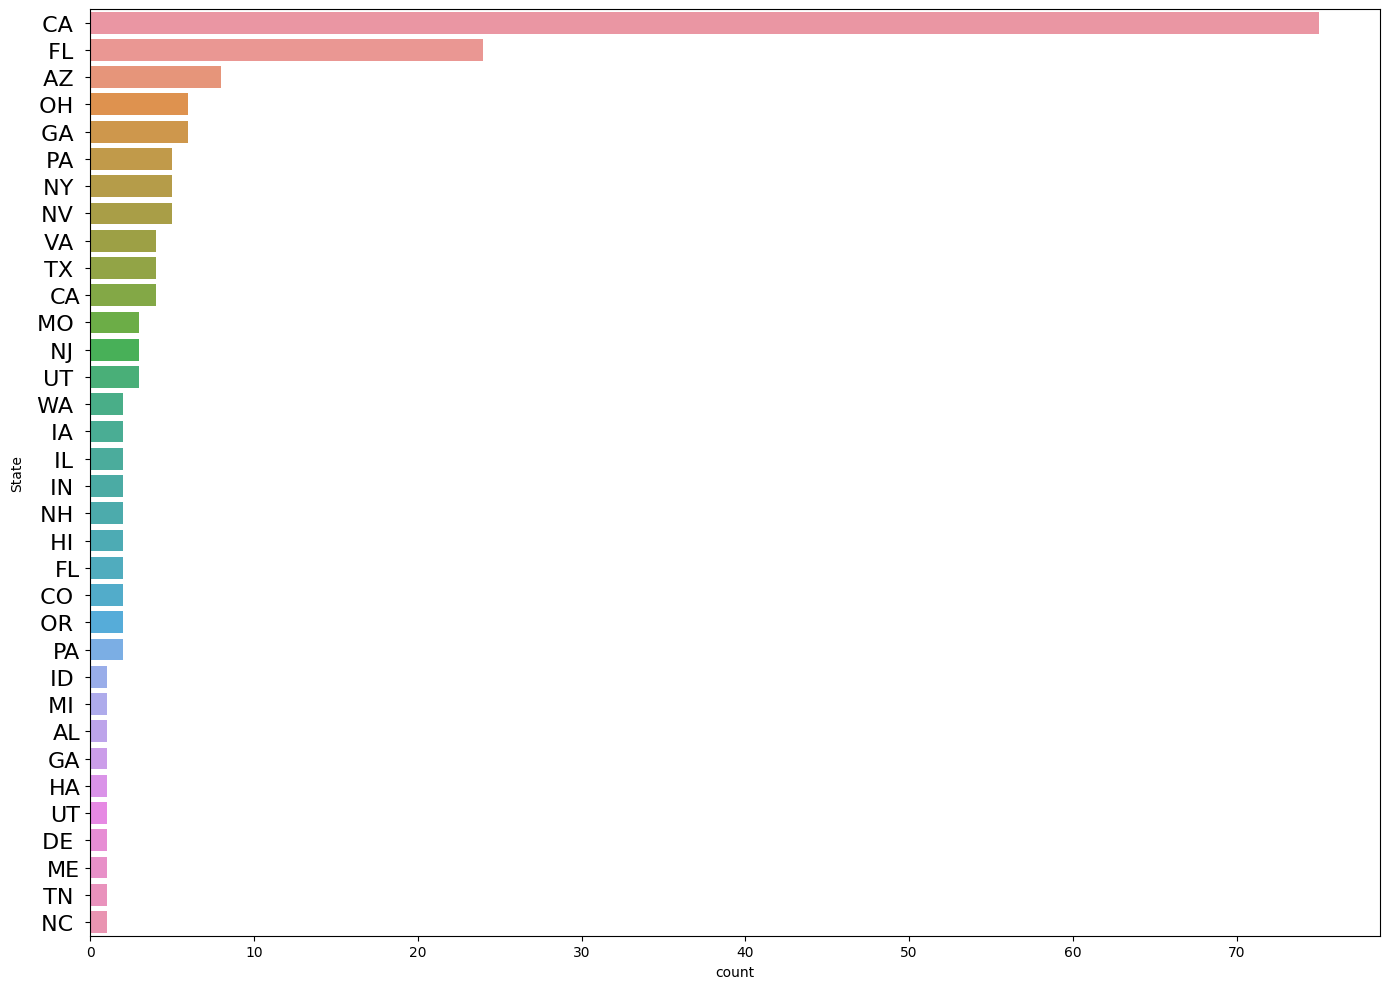

In [18]:
plt.figure(figsize=(14,10))
sns.countplot(y = model_df['State'], order = model_df['State'].value_counts().index)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

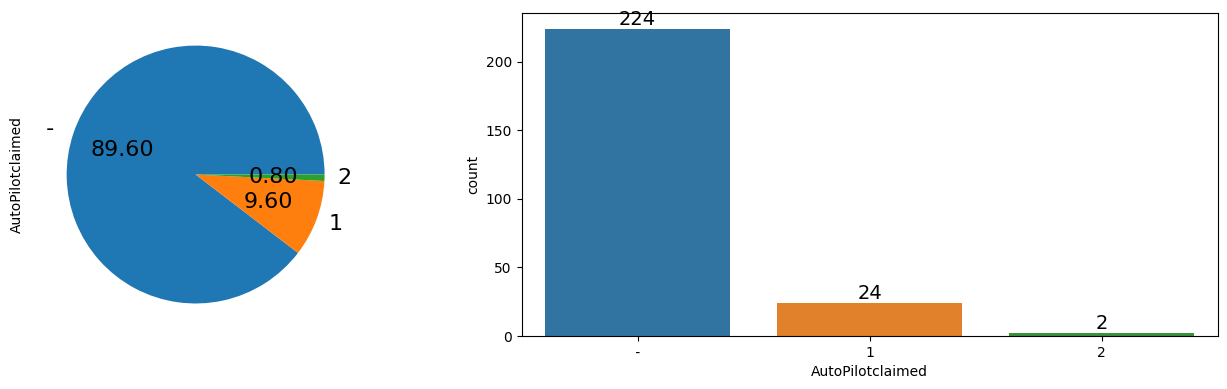

In [19]:
fig, ax = plt.subplots(1,2,figsize = (14,4))
model_df ['AutoPilotclaimed'].value_counts().plot.pie(autopct="%.2f", ax = ax[0], textprops = {'size':16})
sns.countplot(x = df['AutoPilotclaimed'], ax = ax[1])
for i in ax[1].containers:
    ax[1].bar_label(i, fontsize=14)
plt.tight_layout()
plt.show()

In [26]:
DatasetExam(model_df)

(254, 9)
74


,Unique,Null Values,Null Percentage,Data Types
Country,22,0,0.0,object
Deaths,4,0,0.0,int64
Model,6,0,0.0,object
Cyclists/Peds,4,0,0.0,object
TSLA+cycl/peds,6,0,0.0,object
AutoPilotclaimed,4,0,0.0,object
VerifiedTeslaAutopilotDeath,3,0,0.0,object
State,35,0,0.0,object
Tesladriver,3,0,0.0,object


In [27]:
model_df.columns

Index(['Country', 'Deaths', 'Model', 'Cyclists/Peds', 'TSLA+cycl/peds',
       'AutoPilotclaimed', 'VerifiedTeslaAutopilotDeath', 'State',
       'Tesladriver'],
      dtype='object')

In [28]:
model_df.head()

,Country,Deaths,Model,Cyclists/Peds,TSLA+cycl/peds,AutoPilotclaimed,VerifiedTeslaAutopilotDeath,State,Tesladriver
0,Germany,2,0,Indefined,2,Indefined,Indefined,0,0
1,USA,4,0,Indefined,4,Indefined,Indefined,CA,1
2,Finland,1,0,1,1,Indefined,Indefined,0,Indefined
3,USA,1,3,1,1,Indefined,Indefined,FL,Indefined
4,USA,1,Indefined,Indefined,1,Indefined,Indefined,ME,1


In [29]:
# handling data
for i in model_df.columns:
    model_df[i]=model_df[i].replace(' - ','Indefined')
    model_df[i]=model_df[i].replace(' ','')
    model_df[i] = model_df[i].fillna("0")

In [30]:
model_df

,Country,Deaths,Model,Cyclists/Peds,TSLA+cycl/peds,AutoPilotclaimed,VerifiedTeslaAutopilotDeath,State,Tesladriver
0,Germany,2,0,Indefined,2,Indefined,Indefined,0,0
1,USA,4,0,Indefined,4,Indefined,Indefined,CA,1
2,Finland,1,0,1,1,Indefined,Indefined,0,Indefined
3,USA,1,3,1,1,Indefined,Indefined,FL,Indefined
4,USA,1,Indefined,Indefined,1,Indefined,Indefined,ME,1
...,...,...,...,...,...,...,...,...,...
249,USA,1,Indefined,Indefined,Indefined,Indefined,Indefined,CA,Indefined
250,USA,1,Indefined,Indefined,1,Indefined,Indefined,CA,1
251,USA,3,Indefined,Indefined,Indefined,Indefined,Indefined,CA,Indefined
252,USA,1,Indefined,1,1,Indefined,Indefined,CA,Indefined


In [32]:
DatasetExam(model_df)

(254, 9)
74


,Unique,Null Values,Null Percentage,Data Types
Country,22,0,0.0,object
Deaths,4,0,0.0,int64
Model,6,0,0.0,object
Cyclists/Peds,4,0,0.0,object
TSLA+cycl/peds,6,0,0.0,object
AutoPilotclaimed,4,0,0.0,object
VerifiedTeslaAutopilotDeath,3,0,0.0,object
State,35,0,0.0,object
Tesladriver,3,0,0.0,object


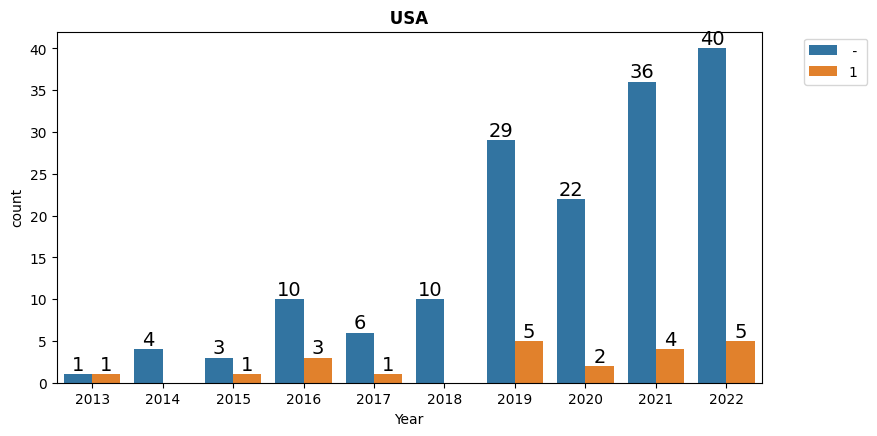

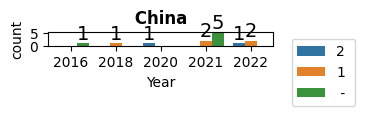

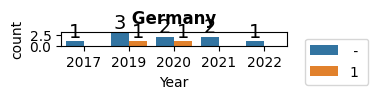

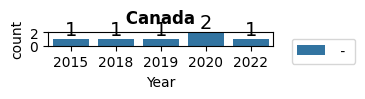

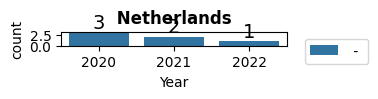

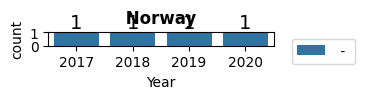

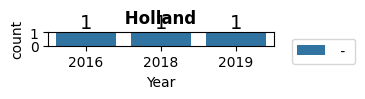

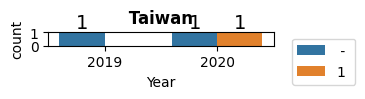

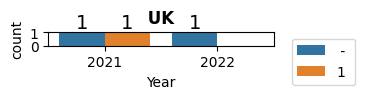

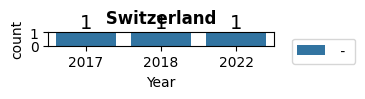

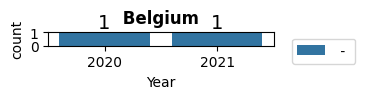

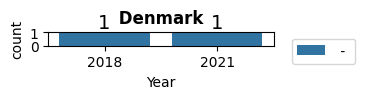

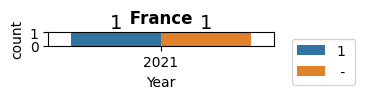

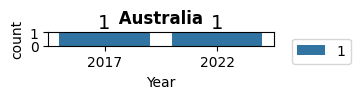

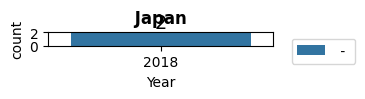

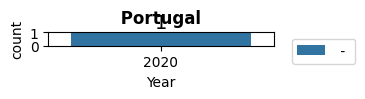

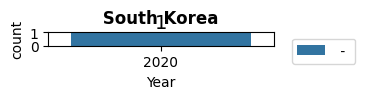

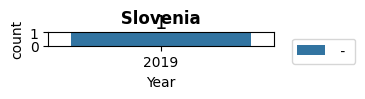

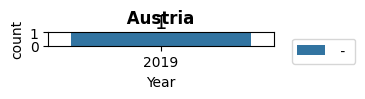

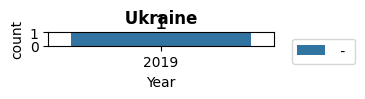

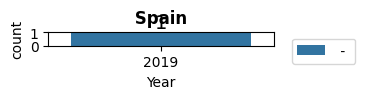

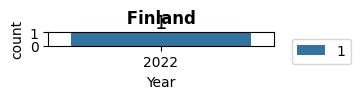

In [33]:
plt.figure(figsize = (16,90))
for i , col in enumerate(model_df['Country'].value_counts().index):
    fig = plt.subplot(22,2, i + 1)
    sns.countplot(x='Year', hue='Cyclists/Peds',data=df[df['Country'] == col])
    plt.title(col, fontweight = "bold")
    for i in fig.containers:
        fig.bar_label(i, fontsize = 14)
    plt.legend(loc =2 , bbox_to_anchor = (1.05,1))
    plt.tight_layout()
    plt.show()

# Model Building

In [34]:
from sklearn import preprocessing
lab_encoder = preprocessing.LabelEncoder()
for i in model_df.columns:
    model_df[i] = lab_encoder.fit_transform(model_df[i])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [36]:
model_df

,Country,Deaths,Model,Cyclists/Peds,TSLA+cycl/peds,AutoPilotclaimed,VerifiedTeslaAutopilotDeath,State,Tesladriver
0,8,1,3,3,2,3,2,26,0
1,20,3,3,3,4,3,2,28,1
2,6,0,3,1,1,3,2,26,2
3,20,0,4,1,1,3,2,29,2
4,20,0,5,3,1,3,2,32,1
...,...,...,...,...,...,...,...,...,...
249,20,0,5,3,5,3,2,1,2
250,20,0,5,3,1,3,2,1,1
251,20,2,5,3,5,3,2,1,2
252,20,0,5,1,1,3,2,1,2


In [37]:
X = model_df.iloc[:, 0:8]
Y = model_df['Tesladriver']

In [38]:
X

,Country,Deaths,Model,Cyclists/Peds,TSLA+cycl/peds,AutoPilotclaimed,VerifiedTeslaAutopilotDeath,State
0,8,1,3,3,2,3,2,26
1,20,3,3,3,4,3,2,28
2,6,0,3,1,1,3,2,26
3,20,0,4,1,1,3,2,29
4,20,0,5,3,1,3,2,32
...,...,...,...,...,...,...,...,...
249,20,0,5,3,5,3,2,1
250,20,0,5,3,1,3,2,1
251,20,2,5,3,5,3,2,1
252,20,0,5,1,1,3,2,1


In [39]:
Y

0      0
1      1
2      2
3      2
4      1
      ..
249    2
250    1
251    2
252    2
253    2
Name: Tesladriver, Length: 254, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [41]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluation

In [42]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.8431372549019608


In [43]:
#visualizing decision tree
!pip install pydotplus
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


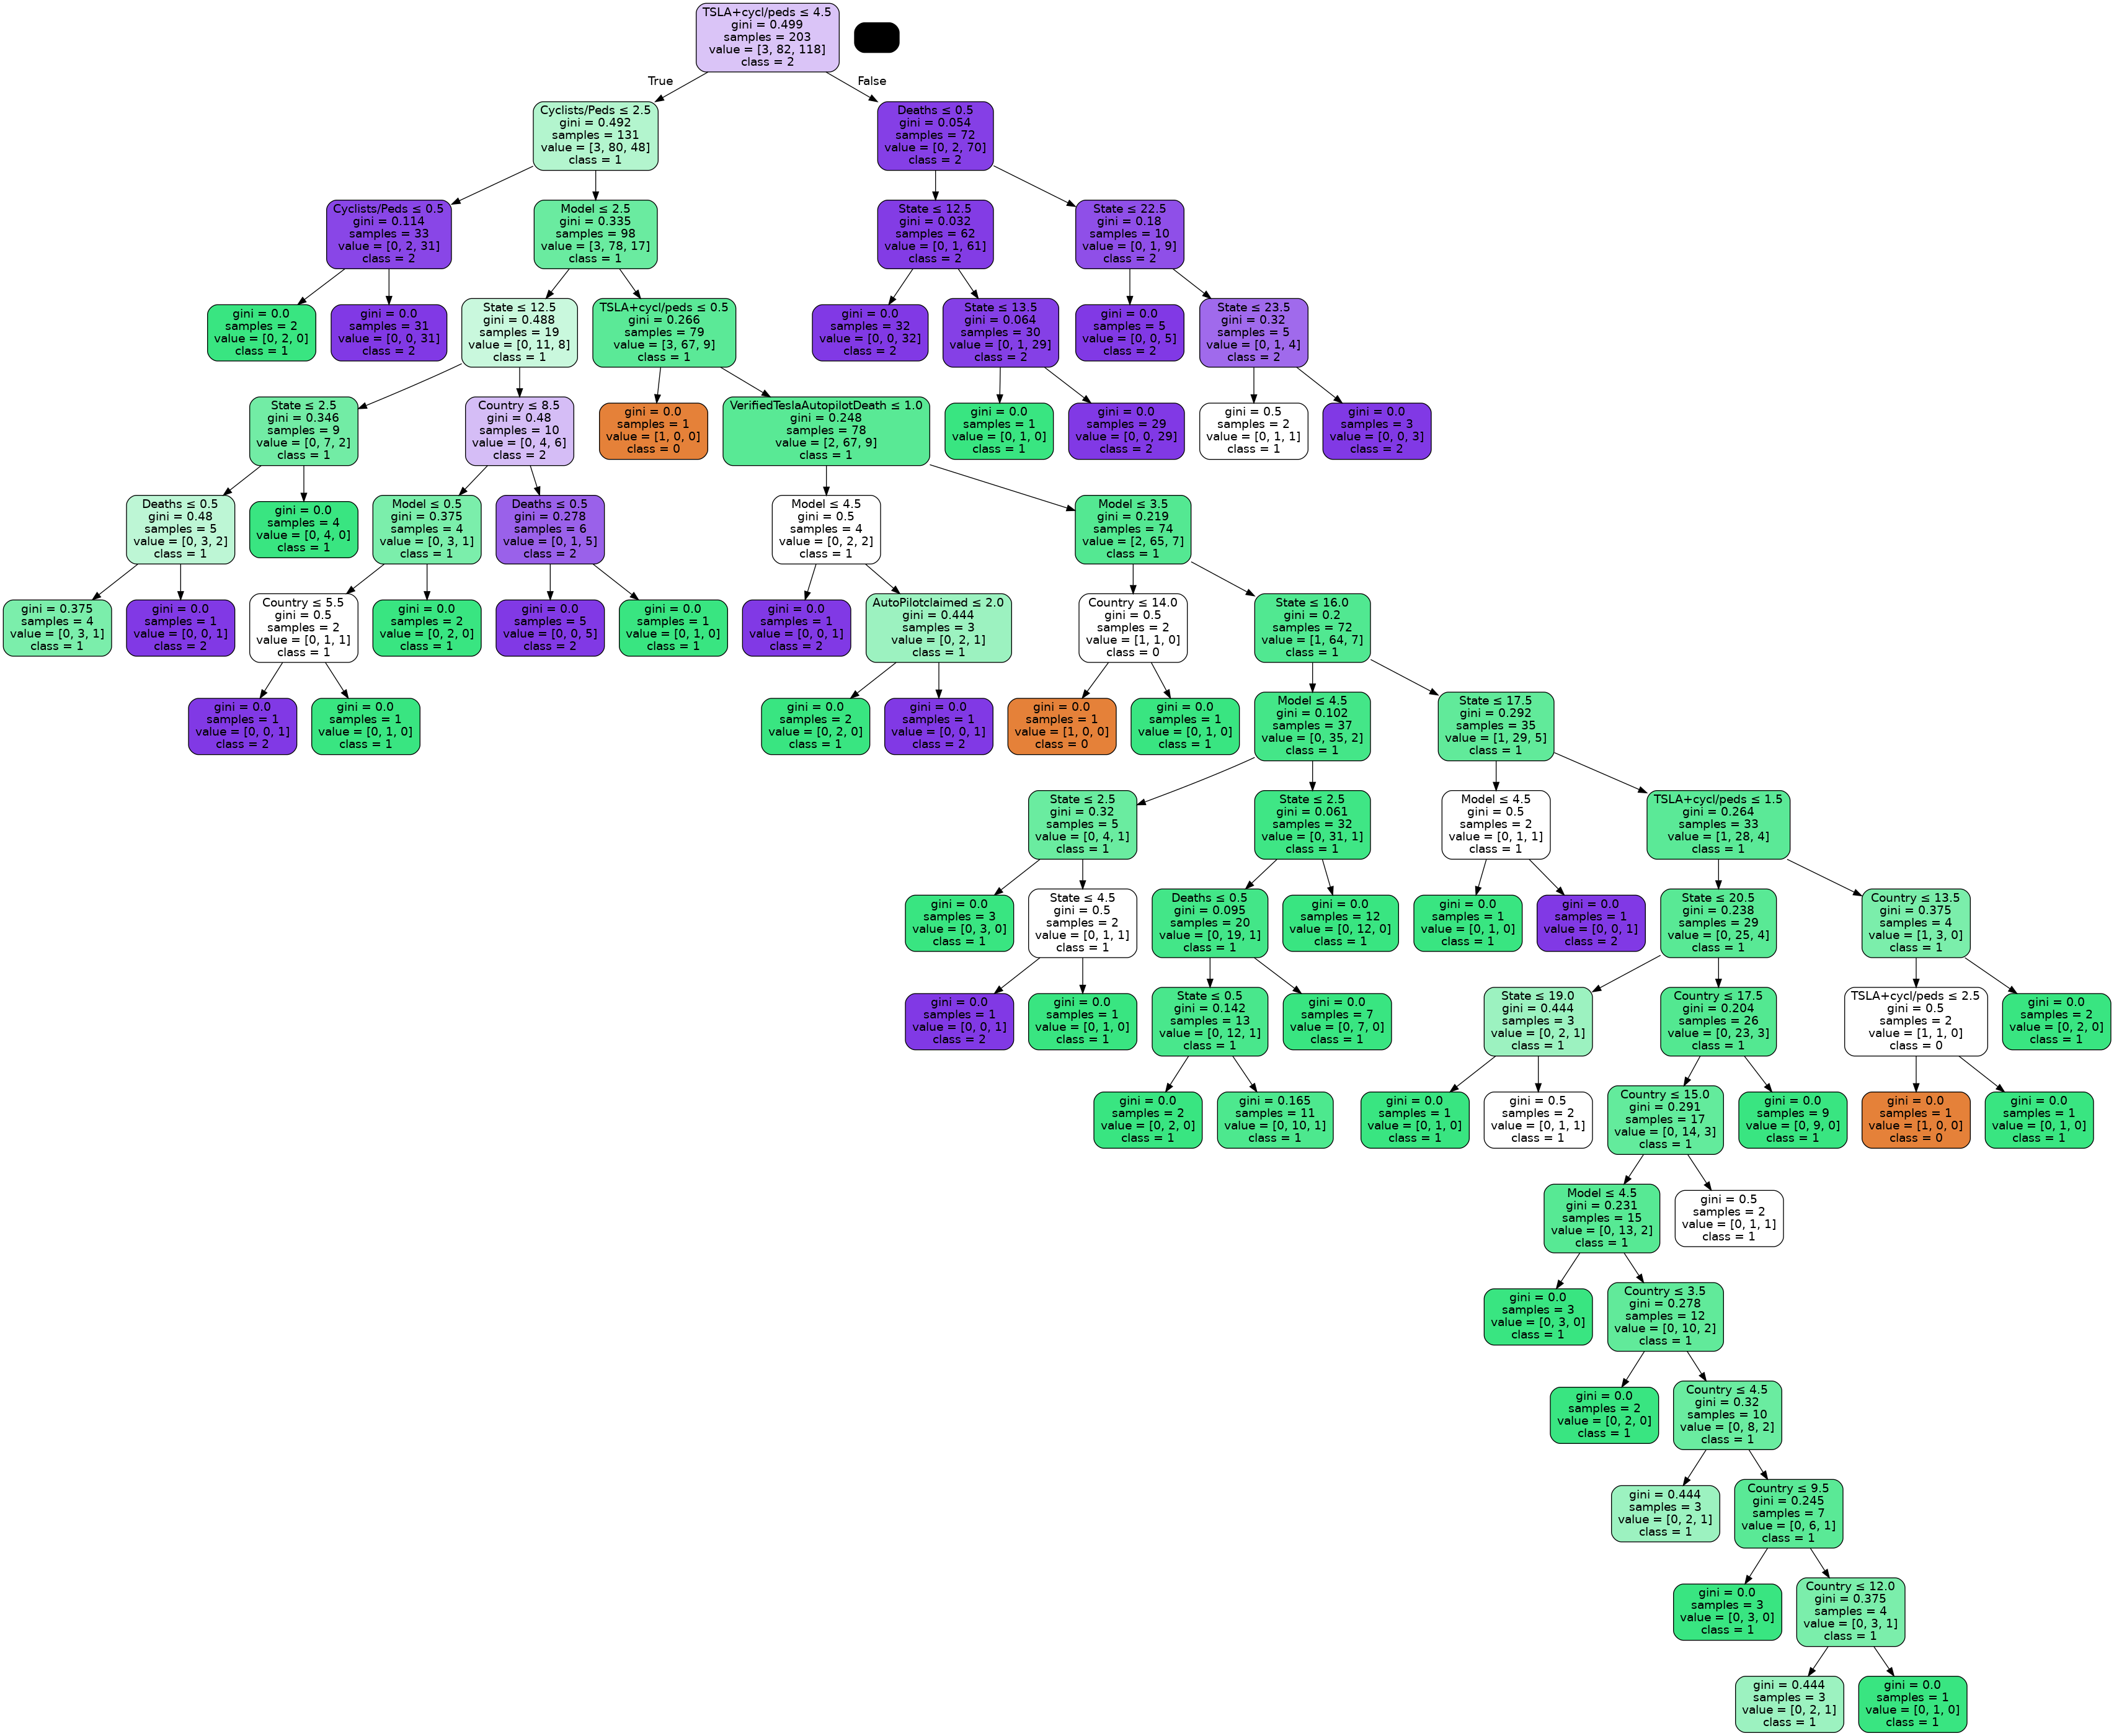

In [44]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()

export_graphviz (clf, out_file = dot_data, 
                   filled = True,
                   rounded = True,
                   special_characters = True, feature_names = X_train.columns, class_names = ["0","1", "2"],
                  )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('TeslaDeath.png')
Image(graph.create_png())


# random forest model

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
classifier_rf = RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = 5, n_estimators = 100, oob_score = True)

In [47]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [48]:
classifier_rf.oob_score_

0.8571428571428571

# Hyper parameter tuning - Random Forest

In [49]:
rf = RandomForestClassifier(random_state=42, n_jobs = -1)

In [50]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,200],
    "n_estimators": [10,25,30,50,100,200]
}

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid_search = GridSearchCV(estimator=rf, param_grid = params, cv = 4, n_jobs = -1, verbose=1, scoring="accuracy")

In [53]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 1.65 s, sys: 215 ms, total: 1.86 s
Wall time: 42.4 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [54]:
grid_search.best_score_

0.8674509803921568

In [55]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

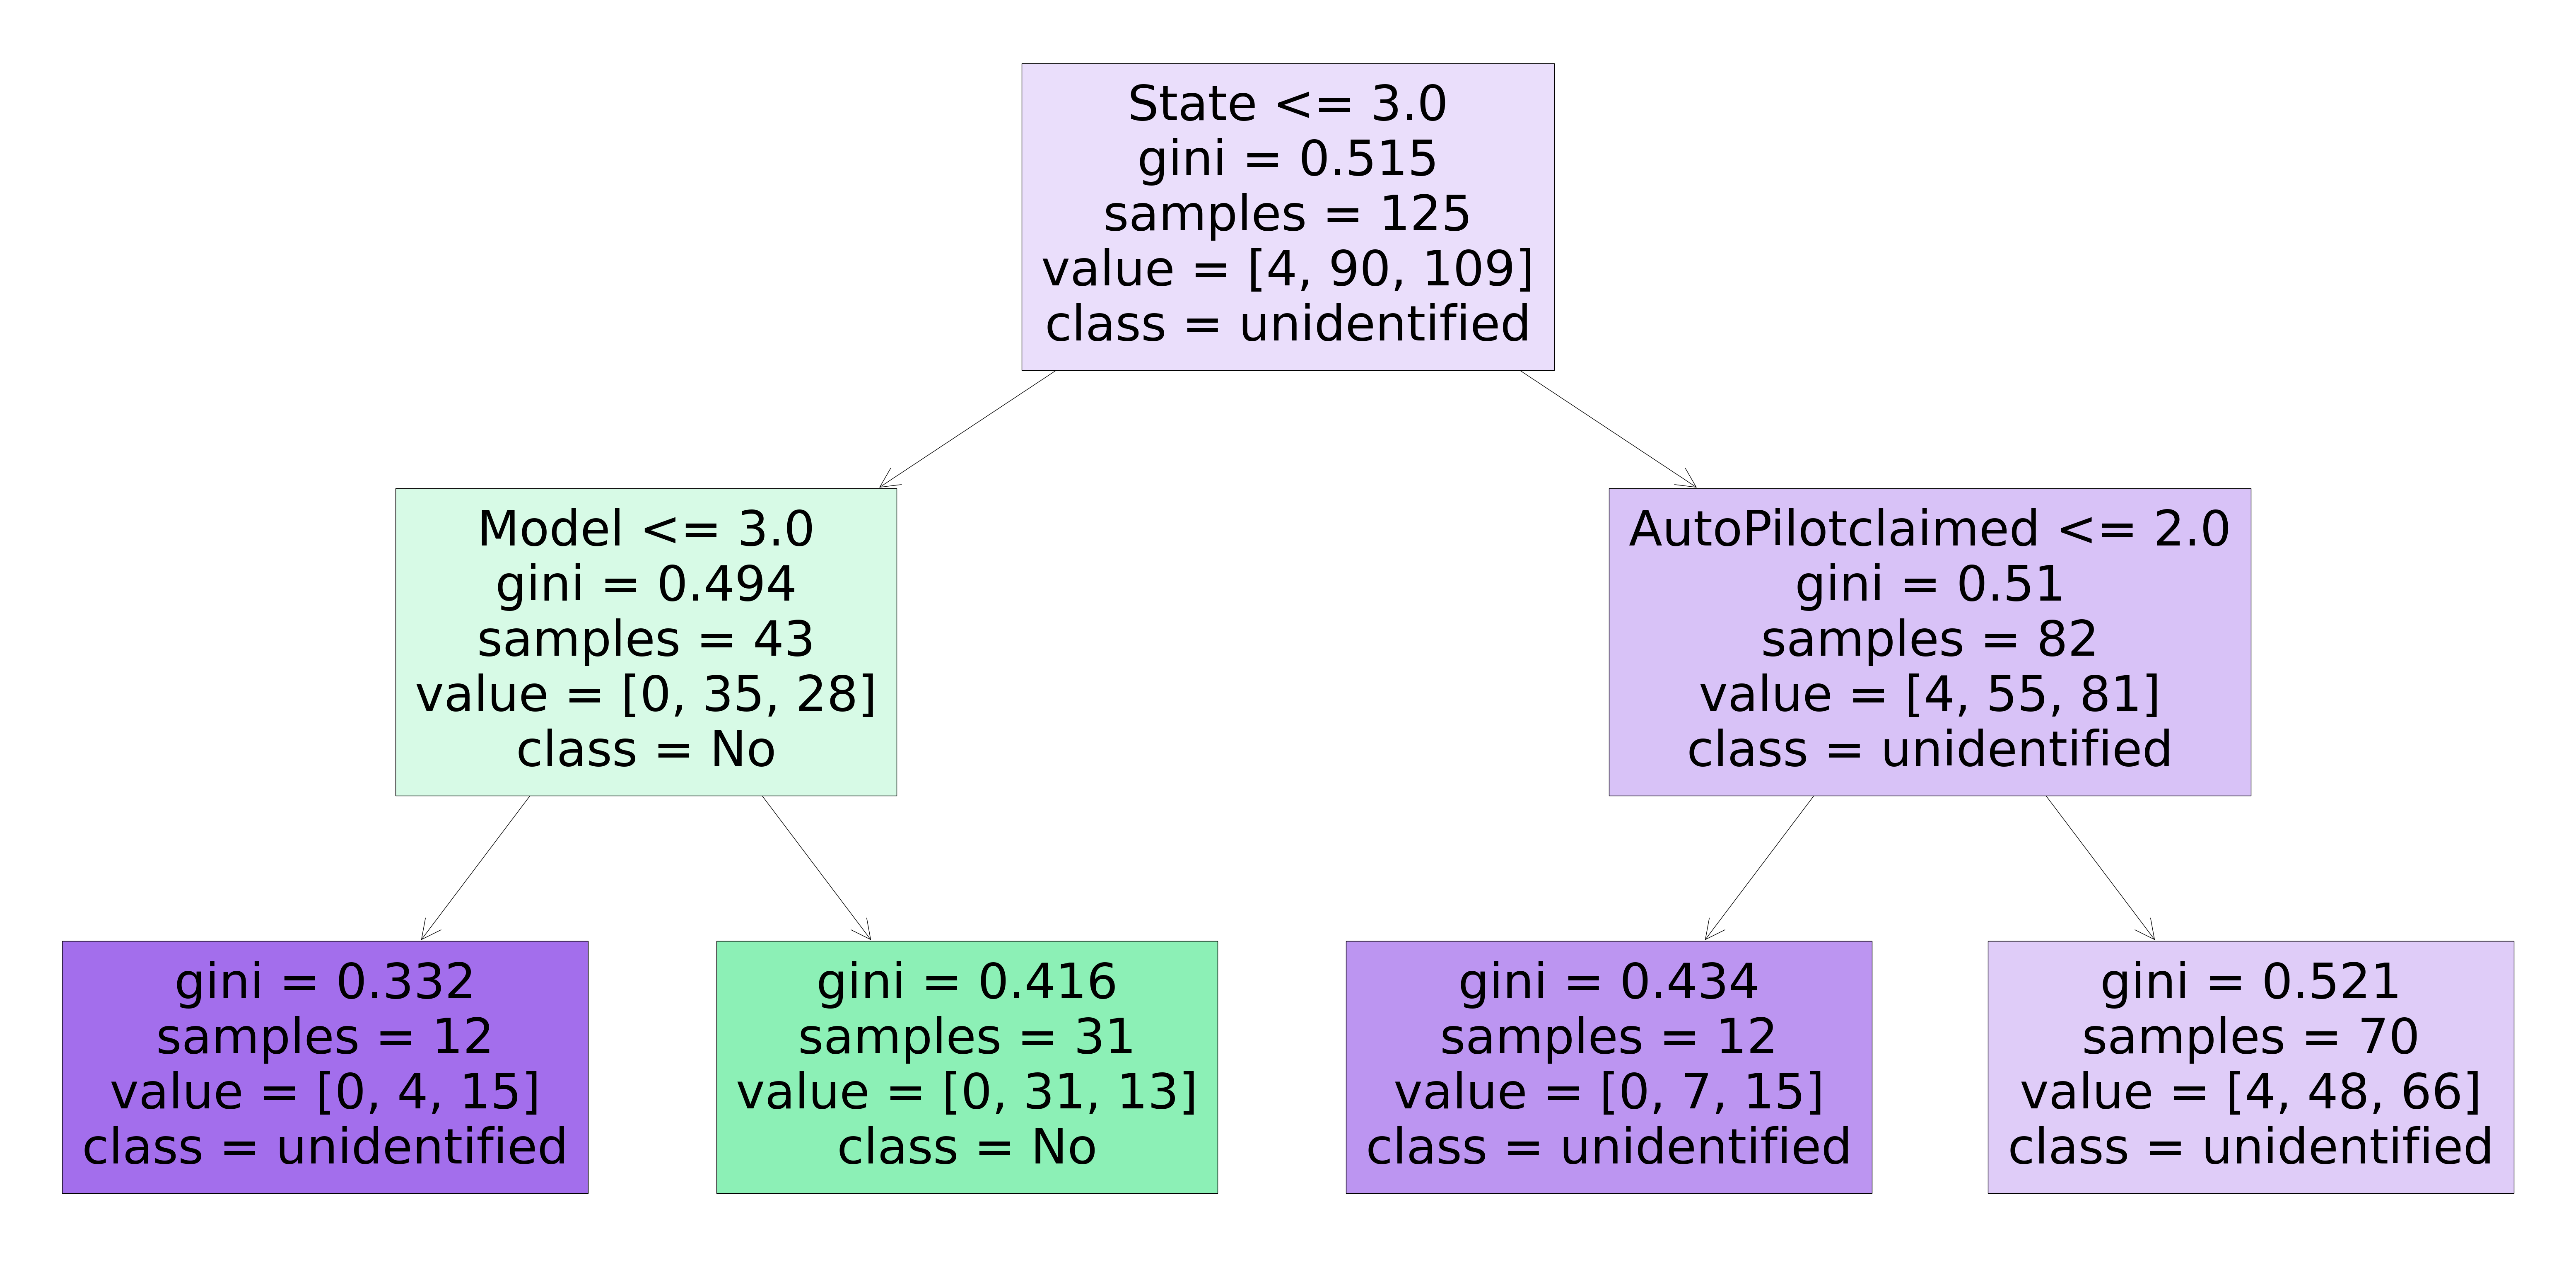

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Yes', "No","unidentified"],filled=True);

# Checking the feature importances

In [57]:
rf_best.feature_importances_

array([0.04720173, 0.12219426, 0.17017396, 0.192787  , 0.37190253,
       0.02433584, 0.        , 0.07140467])

In [58]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "imp": rf_best.feature_importances_
})

In [59]:
imp_df.sort_values(by="imp", ascending = False)

,Varname,imp
4,TSLA+cycl/peds,0.371903
3,Cyclists/Peds,0.192787
2,Model,0.170174
1,Deaths,0.122194
7,State,0.071405
0,Country,0.047202
5,AutoPilotclaimed,0.024336
6,VerifiedTeslaAutopilotDeath,0.000000


# Final outcome

- cyclists / peds are major reason to accident of tesla cars.
- Model has also significant effect on ratio of such incidents.
- Country is mattering for the outcome as well.

#### So we can use all those above mentioned features to predict if a tesla driver will die or not.